In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpg = pd.read_csv("auto-mpg.csv")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
#check if data set has any null values or invalid data types
#note : horsepower columns has invalid data type it (object) but must be int
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
#i found the missing value (?)

mpg['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
mpg[mpg['horsepower'] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [6]:
mpg['horsepower'].replace('?',0,inplace=True)

In [7]:
mpg['horsepower'] = mpg['horsepower'].astype('int')

In [8]:
mean_ford_horsepower = mpg[mpg['car name'].str.contains('ford')]['horsepower'].mean()

In [9]:
mpg['horsepower'].replace(0, int(mean_ford_horsepower), inplace=True)

In [10]:
mpg.duplicated().sum()

0

In [11]:
mpg.columns = mpg.columns.str.replace(' ','_')

In [12]:
mpg['car_name'] = mpg['car_name'].str.replace(' ','_')

In [13]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet_chevelle_malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick_skylark_320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth_satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc_rebel_sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford_torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford_mustang_gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw_pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge_rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford_ranger


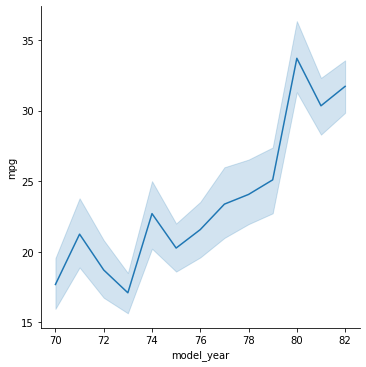

In [14]:
#in this figure we see the higher the year of release, the higher the mpg

sns.relplot(x='model_year', y='mpg', data=mpg, kind='line')
plt.show()

<AxesSubplot:xlabel='cylinders', ylabel='count'>

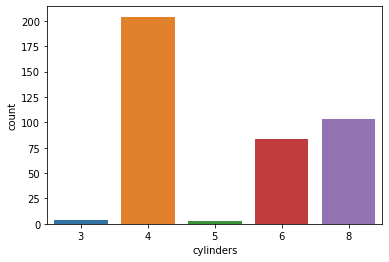

In [15]:
#Most cars have 4 cylinders

sns.countplot(x="cylinders", data=mpg)

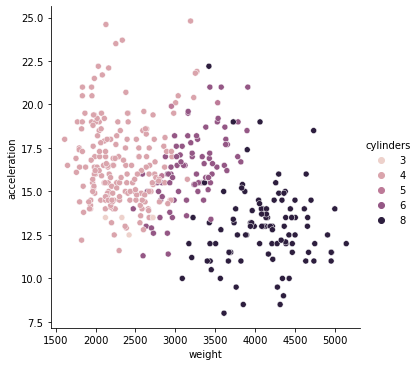

In [16]:
#The greater the weight of the car, the greater the number of cylinders and the lower the acceleration

sns.relplot(x='weight', y='acceleration', data=mpg, kind='scatter', hue='cylinders')

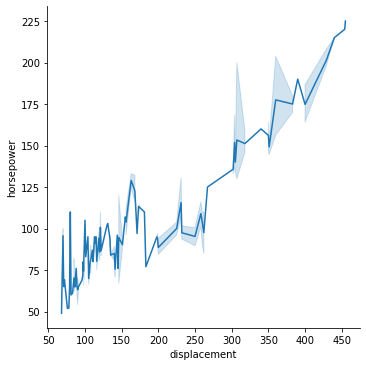

In [17]:
#horsepower of cars is increase with the displacement of cars 
sns.relplot(x='displacement', y='horsepower', data=mpg, kind='line')

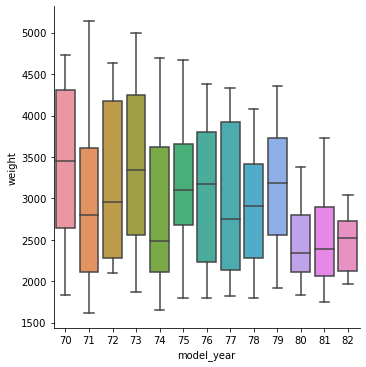

In [18]:
#Hence, we conclude that the weight decreases every year
sns.catplot(x='model_year', y='weight', data=mpg, kind='box')

<Figure size 2880x1440 with 0 Axes>

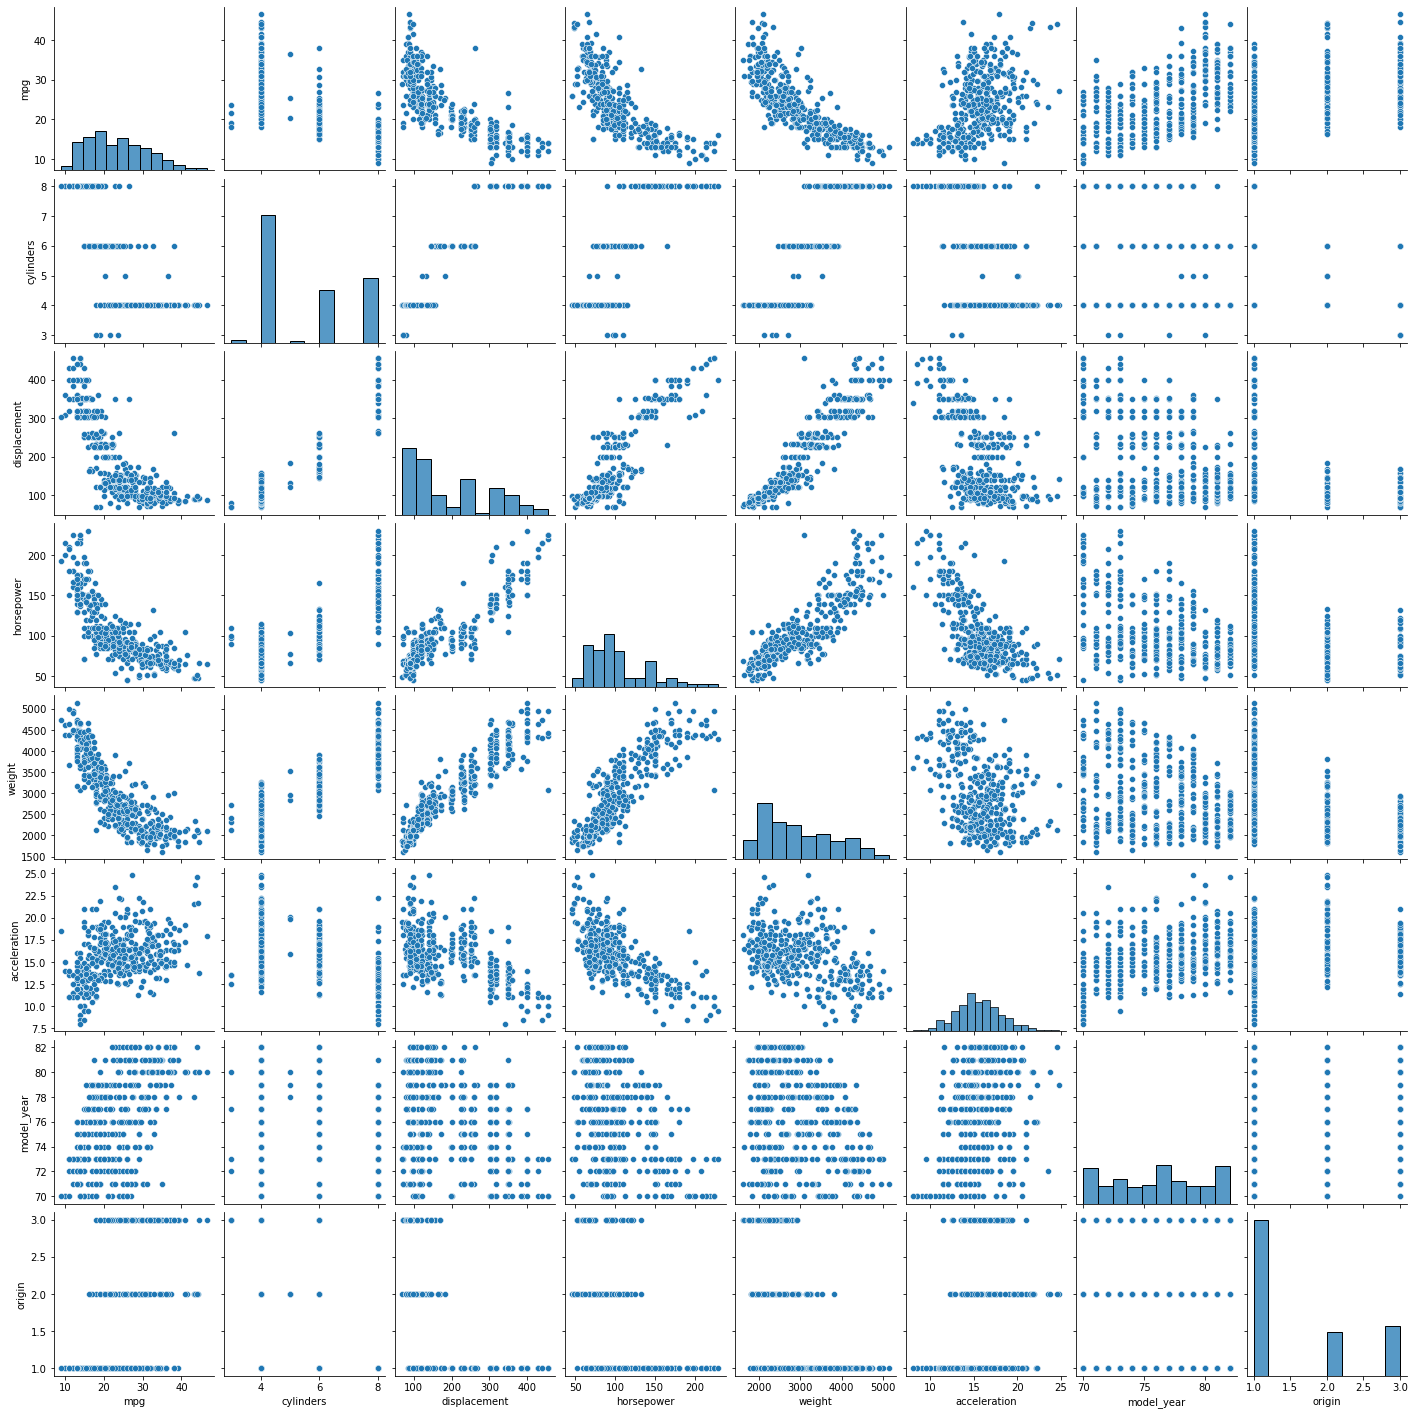

<Figure size 2880x1440 with 0 Axes>

In [19]:
#Compare all columns with each other

sns.pairplot(mpg)
plt.figure(figsize=(40,20))